# Kuis 1 FI3103 Metode Komputasi
## Nomor 1
Akan dicari titik potong antara kurva $y=f(x)=-x^2-3x+5$ dengan $y=g(x)=2x+4$ menggunakan metode secant. Definisikan fungsi $h(x)$ sebagai
$$h(x)=f(x)-g(x)$$
sehingga $f(x)$ dan $g(x)$ akan saling berpotongan saat $h(x)=0$. Rumus iterasi untuk metode secant adalah
$$x_n = x_{n-1} - f(x_{n-1}) \left( \frac{x_{n-1} - x_{n-2}}{f(x_{n-1}) - f(x_{n-2})} \right)$$
Karena ada dua titik potong, kita gunakan dua nilai awal, yaitu $x_{0(1)}=-6$, $x_{1(1)}=-5$, $x_{0(2)} =0$, dan $x_{1(2)} =1$. Berikut adalah program python untuk mencari titik potong kedua fungsi tersebut dengan metode secant.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definisikan fungsi f(x) dan g(x)
def f(x):
    return x**2 - 9

def g(x):
    return 2*x + 20

# Metode Secant
def secant_method(func, x0, x1, tol=1e-5, max_iter=100):
    for i in range(max_iter):
        f_x0 = func(x0)
        f_x1 = func(x1)
        
        if abs(f_x1 - f_x0) < tol:
            break
        
        x_new = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        
        if abs(x_new - x1) < tol:
            return x_new
        
        x0, x1 = x1, x_new
    
    return x_new

# Definisikan fungsi h(x) = f(x) - g(x)
def h(x):
    return f(x) - g(x)



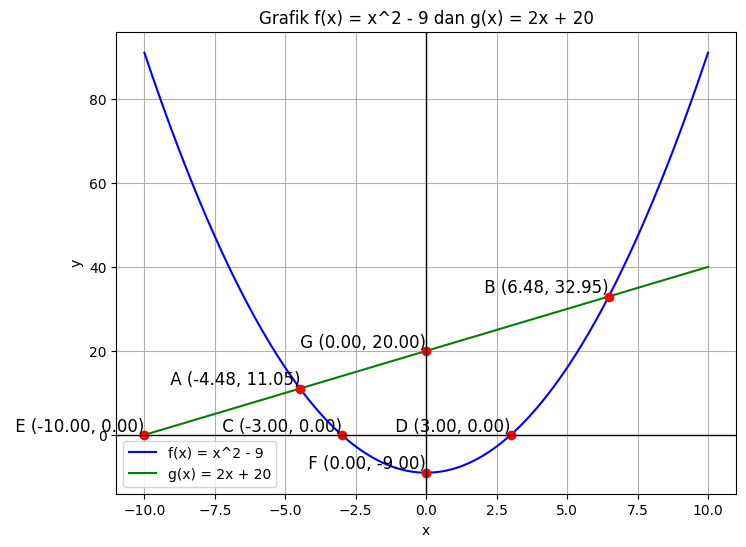

In [3]:
# Nilai tebakan awal untuk titik potong kedua fungsi
intersection_1 = secant_method(h, -5, -4)  # Estimasi awal titik potong pertama
intersection_2 = secant_method(h, 5, 7)   # Estimasi titik potong kedua

# Titik potong dengan sumbu-y
f_y_intercept = f(0)
g_y_intercept = g(0)

# Nilai tebakan awal untuk titik potong kedua fungsi dengan sumbu-x
f_x_intercept_1 = secant_method(f, -4, -2) 
f_x_intercept_2 = secant_method(f, 2, 4)   
g_x_intercept = secant_method(g, -12, -9)   

# Titik-titik potong
points = [
    (intersection_1, f(intersection_1)),    # f(x) dengan g(x)
    (intersection_2, f(intersection_2)),    # f(x) dengan g(x)
    (f_x_intercept_1, 0),                   # f(x) dengan sumbu-x
    (f_x_intercept_2, 0),                   # f(x) dengan sumbu-x
    (g_x_intercept, 0),                     # g(x) dengan sumbu-x
    (0, f_y_intercept),                     # f(x) dengan sumbu-y
    (0, g_y_intercept)                      # g(x) dengan sumbu-y
]

# Label untuk titik-titik potong
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Plot fungsi f(x) dan g(x)
x_vals = np.linspace(-10, 10, 400)
f_vals = f(x_vals)
g_vals = g(x_vals)

plt.figure(figsize=(8,6))

plt.plot(x_vals, f_vals, label='f(x) = x^2 - 9', color='blue')
plt.plot(x_vals, g_vals, label='g(x) = 2x + 20', color='green')

# Plot titik potong
for i, (x, y) in enumerate(points):
    plt.plot(x, y, 'ro')  # Plotkan titik
    plt.text(x, y, f' {labels[i]} ({x:.2f}, {y:.2f})', fontsize=12, verticalalignment='bottom', horizontalalignment='right')

plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.legend()
plt.title("Grafik f(x) = x^2 - 9 dan g(x) = 2x + 20")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
